Internet use and religion in Europe, part two
-----------------------------------------

This notebook presents a second-pass analysis of the association between Internet use and religion in Europe, using data from the European Social Survey (http://www.europeansocialsurvey.org).

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

from iso_country_codes import COUNTRY

%matplotlib inline

The following function selects the columns I need.

In [2]:
def read_cycle(filename):
    """Reads a file containing ESS data and selects columns.
    
    filename: string
    
    returns: DataFrame
    """ 
    df = pd.read_stata(filename, convert_categoricals=False)

    if 'hinctnta' not in df.columns:
        df['hinctnta'] = df.hinctnt
        
    if 'inwyr' not in df.columns:
        df['inwyr'] = df.inwyye
        
    cols = ['cntry', 'inwyr', 'tvtot', 'tvpol', 'rdtot', 'rdpol', 
            'nwsptot', 'nwsppol', 'netuse', 
            'rlgblg', 'rlgdgr', 'eduyrs', 'hinctnta', 'yrbrn', 
            'eisced', 'pspwght', 'pweight']
    df = df[cols]
    return df

Read data from Cycle 1.

In [3]:
df1 = read_cycle('ESS1e06_4.dta')
df1.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,AT,2003,1,1,1,1,1,1,5,1,8,11,77,1949,0,0.940933,0.271488
1,AT,2003,3,2,4,1,2,2,6,2,5,14,2,1953,0,0.470466,0.271488
2,AT,2003,7,3,0,66,0,66,0,1,7,9,77,1940,0,1.392155,0.271488
3,AT,2003,1,1,1,1,2,2,4,1,7,18,9,1959,0,1.382163,0.271488
4,AT,2003,0,66,1,1,0,66,7,1,10,15,9,1962,0,1.437766,0.271488


Read data from Cycle 2.

In [4]:
df2 = read_cycle('ESS2e03_4.dta')
df2.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,AT,2005,3,2,0,66,4,2,7,1,7,12,8,1971,0,0.682185,0.302006
1,AT,2005,7,2,3,1,5,2,0,1,7,8,4,1925,0,0.565038,0.302006
2,AT,2005,6,2,1,0,1,0,6,2,4,13,6,1977,0,0.341133,0.302006
3,AT,2005,3,1,2,1,2,1,7,1,5,8,9,1989,0,0.804050,0.302006
4,AT,2005,2,1,1,1,1,1,4,2,1,11,88,1988,0,1.125251,0.302006


Read data from Cycle 3.

In [5]:
df3 = read_cycle('ESS3e03_5.dta')
df3.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,AT,2007,5,1,7,2,0,66,6,1,3,11,7,1980,0,0.949578,0.289116
1,AT,2007,3,1,2,1,2,1,7,1,9,20,5,1974,0,1.412180,0.289116
2,AT,2007,1,1,7,2,2,1,7,1,6,16,77,1954,0,0.723276,0.289116
3,AT,2007,4,1,7,2,3,2,6,1,5,12,88,1967,0,0.625744,0.289116
4,AT,2007,6,2,6,2,3,1,0,1,7,11,88,1971,0,0.417162,0.289116


Read data from Cycle 4.

In [6]:
df4 = read_cycle('ESS4e04_3.dta')
df4.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,BE,2008,7,1,0,66,0,66,0,2,1,18,4,1972,6,0.823223,0.503773
1,BE,2008,7,2,7,3,0,66,0,2,0,15,7,1982,6,0.798610,0.503773
2,BE,2009,2,2,3,3,3,3,7,1,6,18,10,1940,7,0.778020,0.503773
3,BE,2008,7,2,2,2,2,2,0,1,6,15,7,1931,6,0.777735,0.503773
4,BE,2009,0,66,3,0,1,1,7,2,0,13,7,1982,4,0.960960,0.503773


Read data from Cycle 5.

In [7]:
df5 = read_cycle('ESS5e03_2.dta')
df5.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,BE,2010,5,1,1,0,1,1,2,1,5,15,88,1988,4,0.792865,0.528619
1,BE,2010,4,3,2,2,1,2,6,2,7,15,5,1967,6,0.871107,0.528619
2,BE,2010,4,0,0,66,0,66,7,2,0,13,1,1991,3,0.799453,0.528619
3,BE,2010,2,2,7,2,0,66,7,1,5,15,10,1987,6,0.816030,0.528619
4,BE,2010,7,3,7,4,0,66,0,2,5,15,6,1952,6,0.764902,0.528619


In [8]:
def clean_cycle(df):
    """Cleans data from one cycle.
    
    df: DataFrame
    """
    df.tvtot.replace([77, 88, 99], np.nan, inplace=True)
    df.rdtot.replace([77, 88, 99], np.nan, inplace=True)
    df.nwsptot.replace([77, 88, 99], np.nan, inplace=True)
    df.netuse.replace([77, 88, 99], np.nan, inplace=True)
    df.tvpol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.rdpol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.nwsppol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.eduyrs.replace([77, 88, 99], np.nan, inplace=True)
    df.rlgblg.replace([7, 8, 9], np.nan, inplace=True)
    df.rlgdgr.replace([77, 88, 99], np.nan, inplace=True)
    df.hinctnta.replace([77, 88, 99], np.nan, inplace=True)
    df.yrbrn.replace([7777, 8888, 9999], np.nan, inplace=True)
    df.inwyr.replace([9999], np.nan, inplace=True)
    
    df['hasrelig'] = (df.rlgblg==1).astype(int)
    df.loc[df.rlgblg.isnull(), 'hasrelig'] = np.nan
    
    df['yrbrn60'] = df.yrbrn - 1960
    df['inwyr07'] = df.inwyr - 2007 + np.random.uniform(-0.5, 0.5, len(df))

In [9]:
cycles = [df1, df2, df3, df4, df5]
for cycle in cycles:
    clean_cycle(cycle)

In [10]:
def resample(df):
    """Resample data by country.
    
    df: DataFrame
    
    returns: map from country code to DataFrame
    """
    res = {}
    grouped = df.groupby('cntry')
    for name, group in grouped:
        sample = group.sample(len(group), weights=group.pspwght, replace=True)
        sample.index = range(len(group))
        res[name] = sample
    return res

# each cycle_map is a map from country code to DataFrame
cycle_maps = [resample(cycle) for cycle in cycles]
for cycle_map in cycle_maps:
    print(len(cycle_map), 'countries')

22 countries
25 countries
23 countries
29 countries
27 countries


In a each cycle, a few questions were not asked in some countries.

In [11]:
def check_variables(name, group):
    """Print variables missing from a group.
    
    name: group name (country code)
    group: DataFrame
    """
    varnames = ['cntry', 'tvtot', 'tvpol', 'rdtot', 'rdpol', 
                'nwsptot', 'nwsppol', 'netuse', 'inwyr07', 
                'rlgblg', 'rlgdgr', 'eduyrs', 'hinctnta', 
                'yrbrn', 'pspwght', 'pweight']
    for var in varnames:
        n = len(group[var].dropna())
        if (n < 100):
            print(name, var, len(group[var].dropna()))

for i, cycle_map in enumerate(cycle_maps):
    print('Cycle', i+1)
    for name, group in cycle_map.items():
        check_variables(name, group)

Cycle 1
FR netuse 0
FR hinctnta 0
DE netuse 0
HU hinctnta 0
IE hinctnta 0
Cycle 2
FR netuse 0
FI rlgblg 0
EE hinctnta 0
UA hinctnta 0
Cycle 3
HU hinctnta 0
EE hinctnta 0
UA hinctnta 0
Cycle 4
BG hinctnta 0
CY hinctnta 0
SK hinctnta 0
Cycle 5
PT hinctnta 0
EE inwyr07 0


I'll remove the cycle/country groups that are missing netuse or rlgblg.

The ones that are missing income information undermine the ability to control for income, but it's a pretty weak effect, so I don't think it's a problem.

inwtr07 is interview year shifted by 1970, the approximate mean.

In [12]:
del cycle_maps[0]['FR']
del cycle_maps[0]['DE']
del cycle_maps[1]['FR']
del cycle_maps[1]['FI']

ee = cycle_maps[4]['EE']
ee.inwyr07 = 3 + np.random.uniform(-0.5, 0.5, len(ee))

Income is reported on a different scale in different cycles, and differs substantially across countries.  So I'm replacing it with rank on a per-country basis: that is, each respondent is mapped to their income rank, from 0 to 1, within their country.

I do the same thing with years of education, in part because there are some suspiciously high values.  At the very least, mapping to rank reduces the effect of outliers.

In [13]:
def replace_var_with_rank(name, df, old, new):
    """Replaces a scale variable with a rank from 0-1.
    
    Creates a new column.
    
    name: country code
    df: DataFrame
    old: old variable name
    new: new variable name
    """
    # jitter the data
    series = df[old] + np.random.uniform(-0.25, 0.25, len(df))
    
    # if there's no data, just put in random values
    if len(series.dropna()) < 10:
        df[new] = np.random.random(len(df))
        return
    
    # map from values to ranks
    cdf = thinkstats2.Cdf(series)
    df[new] = cdf.Probs(series)
    
    # make sure NaN maps to NaN
    df.loc[df[old].isnull(), new] = np.nan
    
    
def replace_with_ranks(cycle_map):
    """Replace variables within countries.
    
    cycle_map: map from country code to DataFrame
    """
    for name, group in cycle_map.items():
        replace_var_with_rank(name, group, 'hinctnta', 'hincrank')
        replace_var_with_rank(name, group, 'eduyrs', 'edurank')
        
for cycle_map in cycle_maps:
    replace_with_ranks(cycle_map)

To fill missing values, I am drawing random samples from the available values, on a per-country basis.

Since I am not modeling relationships between variables, I am losing some information with this replacement policy; the net effect is to understate the actual strength of all relationships.

In [14]:
def fill_var(df, old, new):
    """Fills missing values.
    
    Creates a new column
    
    df: DataFrame
    old: old variable name
    new: new variable name
    """
    # find the NaN rows
    null = df[df[old].isnull()]
    
    # sample from the non-NaN rows
    fill = df[old].dropna().sample(len(null), replace=True)
    fill.index = null.index
    
    # replace NaNs with the random sample
    df[new] = df[old].fillna(fill)
    
    
def fill_all_vars(df):
    """Fills missing values in the variables we need.
    
    df: DataFrame
    """
    for old in ['hasrelig', 'rlgdgr', 'yrbrn60', 'edurank', 'hincrank',
           'tvtot', 'rdtot', 'nwsptot', 'netuse', 'inwyr07']:
        new = old + '_f'
        fill_var(df, old, new)

In [15]:
def fill_vars_by_country(cycle_map):
    for name, group in cycle_map.items():
        fill_all_vars(group)
        
for cycle_map in cycle_maps:
    fill_vars_by_country(cycle_map)

Concatenate the cycles.

In [16]:
def concat_groups(cycle_map):
    """Concat all countries in a cycle.
    
    cycle_map: map from country code to DataFrame
    
    returns: DataFrame
    """
    return pd.concat(cycle_map.values(), ignore_index=True)

dfs = [concat_groups(cycle_map) for cycle_map in cycle_maps]

for df in dfs:
    print(len(df))

37937
43709
43000
56752
52458


In [17]:
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(233856, 32)


,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,...,hasrelig_f,rlgdgr_f,yrbrn60_f,edurank_f,hincrank_f,tvtot_f,rdtot_f,nwsptot_f,netuse_f,inwyr07_f
0,BE,2002,2,0,7,2,0,NaN,1,1,...,1,4,-8,0.476496,0.761204,2,7,0,1,-5.265308
1,BE,2002,4,1,1,1,0,NaN,0,2,...,0,6,-23,0.444444,0.475585,4,1,0,0,-5.463721
2,BE,2002,5,2,2,1,0,NaN,1,2,...,0,2,-7,0.307158,0.434114,5,2,0,1,-4.811951
3,BE,2002,2,1,0,NaN,0,NaN,0,2,...,0,2,-3,0.167201,0.460201,2,0,0,0,-4.888268
4,BE,2002,6,2,5,0,5,1,1,1,...,1,10,-39,0.207799,0.287625,6,5,5,1,-5.321503


TV watching time on average weekday

In [18]:
df.tvtot.value_counts().sort_index()

0     8029
1    12609
2    32932
3    32466
4    38880
5    29248
6    28409
7    50587
Name: tvtot, dtype: int64

Radio listening, total time on average weekday.

In [19]:
df.rdtot.value_counts().sort_index()

0    57368
1    35800
2    36999
3    18019
4    15176
5    10336
6     9372
7    49540
Name: rdtot, dtype: int64

Newspaper reading, total time on average weekday.

In [20]:
df.nwsptot.value_counts().sort_index()

0    68275
1    72280
2    62358
3    17305
4     6804
5     2729
6     1324
7     1875
Name: nwsptot, dtype: int64

Personal use of Internet, email, www

In [21]:
df.netuse.value_counts().sort_index()

0    71528
1    36749
2     4705
3     3751
4     8248
5     9923
6    28414
7    69833
Name: netuse, dtype: int64

Belong to a particular religion or denomination

In [22]:
df.rlgblg.value_counts().sort_index()

1    148495
2     83497
Name: rlgblg, dtype: int64

How religious

In [23]:
df.rlgdgr.value_counts().sort_index()

0     29052
1     13327
2     16316
3     18726
4     15487
5     40339
6     22866
7     27172
8     23707
9     10667
10    14027
Name: rlgdgr, dtype: int64

Total household net income, all sources

In [24]:
df.hincrank.describe()

count    184192.000000
mean          0.500507
std           0.288454
min           0.000014
25%           0.250977
50%           0.500285
75%           0.750301
max           1.000000
Name: hincrank, dtype: float64

Year born

In [25]:
df.yrbrn.describe()

count    232794.000000
mean       1961.491916
std          18.727516
min        1885.000000
25%        1947.000000
50%        1962.000000
75%        1977.000000
max        1996.000000
Name: yrbrn, dtype: float64

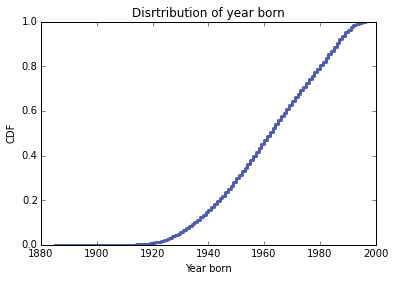

In [26]:
cdf = thinkstats2.Cdf(df.yrbrn)
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Year born', ylabel='CDF', 
                 title='Disrtribution of year born', legend=False)

Shifted to mean near 0

In [27]:
df.yrbrn60.describe()

count    232794.000000
mean          1.491916
std          18.727516
min         -75.000000
25%         -13.000000
50%           2.000000
75%          17.000000
max          36.000000
Name: yrbrn60, dtype: float64

Number of years of education, converted to ranks.

In [28]:
df.edurank.describe()

count    230992.000000
mean          0.500264
std           0.288676
min           0.000332
25%           0.250251
50%           0.500277
75%           0.750251
max           1.000000
Name: edurank, dtype: float64

Country codes

In [29]:
df.cntry.value_counts().sort_index()

AT     6918
BE     8939
BG     6064
CH     9310
CY     3293
CZ     8790
DE    11568
DK     7684
EE     6960
ES     9729
FI     7969
FR     5787
GB    11117
GR     9759
HR     3133
HU     7806
IE    10472
IL     7283
IS      579
IT     1207
LT     1677
LU     3187
LV     1980
NL     9741
NO     8643
PL     8917
PT    10302
RO     2146
RU     7544
SE     9201
SI     7126
SK     6944
TR     4272
UA     7809
Name: cntry, dtype: int64

In [30]:
df.rlgdgr.value_counts().sort_index()

0     29052
1     13327
2     16316
3     18726
4     15487
5     40339
6     22866
7     27172
8     23707
9     10667
10    14027
Name: rlgdgr, dtype: int64

In [31]:
df.inwyr07.describe()

count    233537.000000
mean         -0.219482
std           2.933184
min          -5.499864
25%          -2.722377
50%          -0.247620
75%           2.284778
max           5.499294
Name: inwyr07, dtype: float64

Run the model

In [32]:
def run_model(df, formula):
    model = smf.logit(formula, data=df)    
    results = model.fit(disp=False)
    return results

Here's the model with all control variables and all media variables:

In [33]:
formula = ('hasrelig ~ yrbrn60 + edurank + hincrank +'
           'tvtot + rdtot + nwsptot + netuse')
res = run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               hasrelig   No. Observations:               179125
Model:                          Logit   Df Residuals:                   179117
Method:                           MLE   Df Model:                            7
Date:                Mon, 16 Nov 2015   Pseudo R-squ.:                 0.02992
Time:                        14:59:20   Log-Likelihood:            -1.1470e+05
converged:                       True   LL-Null:                   -1.1824e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0394      0.019     54.565      0.000         1.002     1.077
yrbrn60       -0.0080      0.000    -24.684      0.000        -0.009    -0.007
edurank       -0.0096      0.020     -0.490      0.624        -0.048     0.029
hincrank       0.1361      0.019      7.309      0.000         0.100     0.173
tvtot         -0.0154      0.003     -6.059      0.000        -0.020    -0.010
rdtot         -0.0151      0.002     -7.956      0.000        -0.019    -0.011
nwsptot       -0.0412      0.004    -10.213      0.000        -0.049    -0.033
netuse        -0.1124      0.002    -56.961      0.000        -0.116    -0.109
==============================================================================
"""

Now using the filled variables

In [34]:
formula = ('hasrelig_f ~ yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')
res = run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:               233856
Model:                          Logit   Df Residuals:                   233848
Method:                           MLE   Df Model:                            7
Date:                Mon, 16 Nov 2015   Pseudo R-squ.:                 0.02832
Time:                        14:59:21   Log-Likelihood:            -1.4846e+05
converged:                       True   LL-Null:                   -1.5278e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1082      0.017     66.598      0.000         1.076     1.141
yrbrn60_f     -0.0079      0.000    -28.692      0.000        -0.008    -0.007
edurank_f     -0.0123      0.017     -0.725      0.469        -0.045     0.021
hincrank_f     0.0826      0.016      5.188      0.000         0.051     0.114
tvtot_f       -0.0142      0.002     -6.417      0.000        -0.019    -0.010
rdtot_f       -0.0185      0.002    -11.059      0.000        -0.022    -0.015
nwsptot_f     -0.0425      0.004    -11.886      0.000        -0.050    -0.035
netuse_f      -0.1052      0.002    -60.862      0.000        -0.109    -0.102
==============================================================================
"""

Now adding inwyr07

In [35]:
formula = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')
res = run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:               233856
Model:                          Logit   Df Residuals:                   233847
Method:                           MLE   Df Model:                            8
Date:                Mon, 16 Nov 2015   Pseudo R-squ.:                 0.03166
Time:                        14:59:21   Log-Likelihood:            -1.4795e+05
converged:                       True   LL-Null:                   -1.5278e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1406      0.017     68.130      0.000         1.108     1.173
inwyr07_f      0.0494      0.002     31.850      0.000         0.046     0.052
yrbrn60_f     -0.0085      0.000    -30.617      0.000        -0.009    -0.008
edurank_f      0.0180      0.017      1.058      0.290        -0.015     0.051
hincrank_f     0.0949      0.016      5.949      0.000         0.064     0.126
tvtot_f       -0.0201      0.002     -9.026      0.000        -0.024    -0.016
rdtot_f       -0.0148      0.002     -8.817      0.000        -0.018    -0.012
nwsptot_f     -0.0352      0.004     -9.780      0.000        -0.042    -0.028
netuse_f      -0.1151      0.002    -65.319      0.000        -0.119    -0.112
==============================================================================
"""

In [36]:
def extract_res(res, var='netuse_f'):
    param = res.params[var]
    pvalue = res.pvalues[var]
    stars = '**' if pvalue < 0.01 else '*' if pvalue < 0.05 else ''
    return res.nobs, param, stars

extract_res(res)

(233856, -0.11506110306210458, '**')

Group by country:

In [37]:
grouped = df.groupby('cntry')

Run a sample country

In [38]:
group = grouped.get_group('IS')
run_model(group, formula).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:                  579
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            8
Date:                Mon, 16 Nov 2015   Pseudo R-squ.:                 0.06961
Time:                        14:59:22   Log-Likelihood:                -372.62
converged:                       True   LL-Null:                       -400.50
                                        LLR p-value:                 3.143e-09
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.6075      0.753     -2.136      0.033        -3.083    -0.133
inwyr07_f     -0.0307      0.305     -0.101      0.920        -0.629     0.567
yrbrn60_f     -0.0372      0.006     -6.020      0.000        -0.049    -0.025
edurank_f      0.2802      0.384      0.730      0.465        -0.472     1.033
hincrank_f     0.8706      0.326      2.672      0.008         0.232     1.509
tvtot_f        0.0625      0.052      1.206      0.228        -0.039     0.164
rdtot_f       -0.0137      0.036     -0.378      0.706        -0.085     0.057
nwsptot_f     -0.0036      0.107     -0.034      0.973        -0.214     0.207
netuse_f       0.1488      0.044      3.352      0.001         0.062     0.236
==============================================================================
"""

Run all countries

In [39]:
def run_logits(grouped, formula, var):
    for name, group in grouped:
        country = '%14.14s' % COUNTRY[name]
        model = smf.logit(formula, data=group)    
        results = model.fit(disp=False)
        nobs, param, stars = extract_res(results, var=var)
        arrow = '<--' if stars and param > 0 else ''
        print(country, nobs, '%0.3g'%param, stars, arrow, sep='\t')

In [40]:
formula = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

run_logits(grouped, formula, 'netuse_f')

       AUSTRIA	6918	-0.0783	**	
       BELGIUM	8939	-0.0484	**	
      BULGARIA	6064	0.0168		
   SWITZERLAND	9310	-0.037	**	
        CYPRUS	3293	-0.0223		
CZECH REPUBLIC	8790	-0.0164		
       GERMANY	11568	-0.0243	**	
       DENMARK	7684	-0.0374	**	
       ESTONIA	6960	-0.0452	**	
         SPAIN	9729	-0.0657	**	
       FINLAND	7969	-0.0472	**	
        FRANCE	5787	0.000362		
UNITED KINGDOM	11117	-0.0297	**	
        GREECE	9759	-0.031		
       CROATIA	3133	-0.0361		
       HUNGARY	7806	-0.0301	**	
       IRELAND	10472	-0.0582	**	
        ISRAEL	7283	-0.0813	**	
       ICELAND	579	0.149	**	<--
         ITALY	1207	-0.0873	**	
     LITHUANIA	1677	-0.0398		
    LUXEMBOURG	3187	-0.0581	**	
        LATVIA	1980	-0.0319		
   NETHERLANDS	9741	-0.0457	**	
        NORWAY	8643	-0.0385	**	
        POLAND	8917	-0.119	**	
      PORTUGAL	10302	-0.102	**	
       ROMANIA	2146	-0.00946		
RUSSIAN FEDERA	7544	0.0301	**	<--
        SWEDEN	9201	-0.0652	**	
      SLOVENIA	7126	-0.0426	**	
      SLOVAKIA	6944	-0.

In [41]:
run_logits(grouped, formula, 'hincrank_f')

       AUSTRIA	6918	0.375	**	<--
       BELGIUM	8939	-0.136		
      BULGARIA	6064	0.0274		
   SWITZERLAND	9310	-0.143		
        CYPRUS	3293	0.111		
CZECH REPUBLIC	8790	-0.199	*	
       GERMANY	11568	0.518	**	<--
       DENMARK	7684	0.342	**	<--
       ESTONIA	6960	-0.241	*	
         SPAIN	9729	0.0597		
       FINLAND	7969	0.0164		
        FRANCE	5787	-0.0222		
UNITED KINGDOM	11117	-0.0577		
        GREECE	9759	-0.758	**	
       CROATIA	3133	0.12		
       HUNGARY	7806	-0.119		
       IRELAND	10472	0.285	**	<--
        ISRAEL	7283	-0.1		
       ICELAND	579	0.871	**	<--
         ITALY	1207	0.519	*	<--
     LITHUANIA	1677	0.655	**	<--
    LUXEMBOURG	3187	0.302	*	<--
        LATVIA	1980	0.0253		
   NETHERLANDS	9741	-0.407	**	
        NORWAY	8643	-0.0125		
        POLAND	8917	-0.156		
      PORTUGAL	10302	-0.0845		
       ROMANIA	2146	0.0659		
RUSSIAN FEDERA	7544	-0.0556		
        SWEDEN	9201	-0.112		
      SLOVENIA	7126	-0.313	**	
      SLOVAKIA	6944	0.0315		
        TURKEY	4272	-0.119		
  

In [42]:
run_logits(grouped, formula, 'edurank_f')

       AUSTRIA	6918	-0.682	**	
       BELGIUM	8939	0.142		
      BULGARIA	6064	-0.247		
   SWITZERLAND	9310	-0.665	**	
        CYPRUS	3293	-1.19	*	
CZECH REPUBLIC	8790	-0.38	**	
       GERMANY	11568	-0.616	**	
       DENMARK	7684	-0.241	**	
       ESTONIA	6960	0.0551		
         SPAIN	9729	-0.4	**	
       FINLAND	7969	0.127		
        FRANCE	5787	0.0997		
UNITED KINGDOM	11117	0.446	**	<--
        GREECE	9759	-1.34	**	
       CROATIA	3133	-0.693	**	
       HUNGARY	7806	-0.604	**	
       IRELAND	10472	-0.198	*	
        ISRAEL	7283	-0.0924		
       ICELAND	579	0.28		
         ITALY	1207	0.192		
     LITHUANIA	1677	0.13		
    LUXEMBOURG	3187	-1.01	**	
        LATVIA	1980	0.303		
   NETHERLANDS	9741	-0.412	**	
        NORWAY	8643	-0.106		
        POLAND	8917	-1.16	**	
      PORTUGAL	10302	-0.715	**	
       ROMANIA	2146	-1.43	**	
RUSSIAN FEDERA	7544	-0.0916		
        SWEDEN	9201	0.561	**	<--
      SLOVENIA	7126	-0.413	**	
      SLOVAKIA	6944	-0.298	**	
        TURKEY	4272	-1.69	**	
       UKRA

Run OLS model with `rlgdgr`: "Regardless of whether you belong to a particular religion, how religious would you say you are?"

In [43]:
formula = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')
model = smf.ols(formula, data=df)    
results = model.fit(disp=False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rlgdgr_f   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1559.
Date:                Mon, 16 Nov 2015   Prob (F-statistic):               0.00
Time:                        14:59:26   Log-Likelihood:            -5.7994e+05
No. Observations:              233856   AIC:                         1.160e+06
Df Residuals:                  233847   BIC:                         1.160e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.0342      0.022    270.724      0.000         5.991     6.078
inwyr07_f      0.0244      0.002     11.646      0.000         0.020     0.029
yrbrn60_f     -0.0175      0.000    -47.085      0.000        -0.018    -0.017
edurank_f     -0.2782      0.023    -12.079      0.000        -0.323    -0.233
hincrank_f    -0.1569      0.022     -7.236      0.000        -0.199    -0.114
tvtot_f       -0.0763      0.003    -25.339      0.000        -0.082    -0.070
rdtot_f       -0.0238      0.002    -10.429      0.000        -0.028    -0.019
nwsptot_f     -0.0668      0.005    -13.715      0.000        -0.076    -0.057
netuse_f      -0.1367      0.002    -57.186      0.000        -0.141    -0.132
==============================================================================
Omnibus:                    31835.411   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8476.913
Skew:                          -0.134   Prob(JB):                         0.00
Kurtosis:                       2.107   Cond. No.                         85.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
def run_ols(grouped, formula, var):
    for name, group in grouped:
        model = smf.ols(formula, data=group)    
        results = model.fit(disp=False)
        nobs, param, stars = extract_res(results, var=var)
        arrow = '<--' if stars and param > 0 else ''
        print(name, len(group), '%0.3g    '%param, stars, arrow, sep='\t')

In [45]:
run_ols(grouped, formula, 'netuse_f')

AT	6918	-0.0822    	**	
BE	8939	-0.108    	**	
BG	6064	0.00266    		
CH	9310	-0.0905    	**	
CY	3293	-0.0555    	**	
CZ	8790	0.00954    		
DE	11568	-0.0563    	**	
DK	7684	-0.0366    	**	
EE	6960	-0.0176    		
ES	9729	-0.0823    	**	
FI	7969	-0.0187    		
FR	5787	-0.0434    	**	
GB	11117	-0.0301    	**	
GR	9759	-0.0619    	**	
HR	3133	-0.0798    	**	
HU	7806	-0.00543    		
IE	10472	-0.0801    	**	
IL	7283	-0.31    	**	
IS	579	0.0105    		
IT	1207	-0.142    	**	
LT	1677	-0.038    		
LU	3187	-0.145    	**	
LV	1980	-0.0209    		
NL	9741	-0.0827    	**	
NO	8643	-0.065    	**	
PL	8917	-0.0682    	**	
PT	10302	-0.0538    	**	
RO	2146	-0.0302    		
RU	7544	0.0284    	*	<--
SE	9201	-0.0942    	**	
SI	7126	-0.0718    	**	
SK	6944	-0.034    	*	
TR	4272	-0.0322    		
UA	7809	-0.0462    	**	


In [46]:
run_ols(grouped, formula, 'edurank_f')

AT	6918	-0.253    	*	
BE	8939	-0.313    	*	
BG	6064	-0.646    	**	
CH	9310	-0.316    	**	
CY	3293	-0.639    	**	
CZ	8790	-0.438    	**	
DE	11568	-0.624    	**	
DK	7684	-0.374    	**	
EE	6960	0.478    	**	<--
ES	9729	-0.429    	**	
FI	7969	0.175    		
FR	5787	-0.464    	**	
GB	11117	0.428    	**	<--
GR	9759	-1.68    	**	
HR	3133	-1.22    	**	
HU	7806	-0.938    	**	
IE	10472	-0.442    	**	
IL	7283	-0.904    	**	
IS	579	0.0494    		
IT	1207	0.0235    		
LT	1677	-0.00891    		
LU	3187	-1.95    	**	
LV	1980	0.263    		
NL	9741	-0.157    		
NO	8643	0.32    	**	<--
PL	8917	-1.29    	**	
PT	10302	-0.864    	**	
RO	2146	-0.432    	*	
RU	7544	-0.0769    		
SE	9201	0.336    	**	<--
SI	7126	-0.964    	**	
SK	6944	-0.79    	**	
TR	4272	-1.16    	**	
UA	7809	-0.591    	**	


In [47]:
run_ols(grouped, formula, 'hincrank_f')

AT	6918	0.162    		
BE	8939	-0.359    	**	
BG	6064	-0.175    		
CH	9310	-0.29    	**	
CY	3293	-0.37    	**	
CZ	8790	-0.41    	**	
DE	11568	0.372    	**	<--
DK	7684	0.128    		
EE	6960	-0.44    	**	
ES	9729	-0.227    	*	
FI	7969	-0.271    	*	
FR	5787	-0.806    	**	
GB	11117	-0.529    	**	
GR	9759	-0.511    	**	
HR	3133	0.124    		
HU	7806	-0.078    		
IE	10472	-0.0518    		
IL	7283	-0.333    	*	
IS	579	0.0341    		
IT	1207	0.104    		
LT	1677	-0.531    	*	
LU	3187	-0.382    	*	
LV	1980	-0.274    		
NL	9741	-0.853    	**	
NO	8643	-0.192    		
PL	8917	-0.355    	**	
PT	10302	-0.0868    		
RO	2146	-0.178    		
RU	7544	-0.0596    		
SE	9201	-0.249    	*	
SI	7126	-0.876    	**	
SK	6944	0.0426    		
TR	4272	-0.201    		
UA	7809	-0.0463    		


Let's see what happens if we add quadratic terms for edurank and hincrank:

In [48]:
df['edurank_f2'] = df.edurank_f**2
df['hincrank_f2'] = df.hincrank_f**2

In [49]:
formula = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + edurank_f + edurank_f2 + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

In [50]:
run_ols(grouped, formula, 'edurank_f')

AT	6918	-0.669    		
BE	8939	0.186    		
BG	6064	-2.81    	**	
CH	9310	-0.863    	*	
CY	3293	-1.07    		
CZ	8790	-2.53    	**	
DE	11568	-2.79    	**	
DK	7684	-0.748    		
EE	6960	-0.671    		
ES	9729	-1.55    	**	
FI	7969	0.0851    		
FR	5787	-1.85    	**	
GB	11117	-2.16    	**	
GR	9759	-1.93    	**	
HR	3133	-1.85    	**	
HU	7806	-3.03    	**	
IE	10472	-0.237    		
IL	7283	-0.533    		
IS	579	-1.68    		
IT	1207	-2.43    	*	
LT	1677	-1.82    	*	
LU	3187	-2.46    	**	
LV	1980	-1.74    	*	
NL	9741	-0.285    		
NO	8643	-1.05    	*	
PL	8917	-2.44    	**	
PT	10302	-1.2    	**	
RO	2146	-1.35    		
RU	7544	-1.06    	*	
SE	9201	-0.788    		
SI	7126	-2.03    	**	
SK	6944	-2.73    	**	
TR	4272	-0.9    		
UA	7809	-0.66    		


In [51]:
run_ols(grouped, formula, 'edurank_f2')

AT	6918	0.412    		
BE	8939	-0.5    		
BG	6064	2.13    	**	<--
CH	9310	0.55    		
CY	3293	0.427    		
CZ	8790	2.09    	**	<--
DE	11568	2.15    	**	<--
DK	7684	0.373    		
EE	6960	1.15    	*	<--
ES	9729	1.09    	**	<--
FI	7969	0.0867    		
FR	5787	1.36    	*	<--
GB	11117	2.56    	**	<--
GR	9759	0.244    		
HR	3133	0.62    		
HU	7806	2.09    	**	<--
IE	10472	-0.204    		
IL	7283	-0.37    		
IS	579	1.66    		
IT	1207	2.36    	*	<--
LT	1677	1.81    	*	<--
LU	3187	0.513    		
LV	1980	2.02    	*	<--
NL	9741	0.126    		
NO	8643	1.34    	**	<--
PL	8917	1.14    	**	<--
PT	10302	0.324    		
RO	2146	0.896    		
RU	7544	0.979    	*	<--
SE	9201	1.11    	**	<--
SI	7126	1.08    	*	<--
SK	6944	1.94    	**	<--
TR	4272	-0.257    		
UA	7809	0.0687    		


In [52]:
formula = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + edurank_f + edurank_f2 + '
           'hincrank_f + hincrank_f2 + '
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

In [53]:
run_ols(grouped, formula, 'hincrank_f')

AT	6918	1.95    	**	<--
BE	8939	-0.782    		
BG	6064	-0.412    		
CH	9310	0.417    		
CY	3293	-1.34    	**	
CZ	8790	-1.44    	**	
DE	11568	0.149    		
DK	7684	1.5    	**	<--
EE	6960	-1.25    	**	
ES	9729	0.182    		
FI	7969	0.265    		
FR	5787	-1.96    	**	
GB	11117	-0.107    		
GR	9759	-0.63    	*	
HR	3133	1.97    	**	<--
HU	7806	-0.0722    		
IE	10472	0.416    		
IL	7283	-0.525    		
IS	579	-0.719    		
IT	1207	-0.197    		
LT	1677	2.34    	**	<--
LU	3187	-1.03    		
LV	1980	-0.262    		
NL	9741	-0.0917    		
NO	8643	-0.55    		
PL	8917	-0.273    		
PT	10302	0.284    		
RO	2146	-0.35    		
RU	7544	-0.622    		
SE	9201	-0.787    	*	
SI	7126	0.0244    		
SK	6944	0.828    		
TR	4272	-1.16    	*	
UA	7809	0.304    		


In [54]:
run_ols(grouped, formula, 'edurank_f')

AT	6918	-0.782    		
BE	8939	0.232    		
BG	6064	-2.79    	**	
CH	9310	-0.901    	*	
CY	3293	-0.992    		
CZ	8790	-2.44    	**	
DE	11568	-2.77    	**	
DK	7684	-0.859    	*	
EE	6960	-0.641    		
ES	9729	-1.59    	**	
FI	7969	0.0251    		
FR	5787	-1.8    	**	
GB	11117	-2.19    	**	
GR	9759	-1.92    	**	
HR	3133	-2.26    	**	
HU	7806	-3.03    	**	
IE	10472	-0.267    		
IL	7283	-0.519    		
IS	579	-1.57    		
IT	1207	-2.39    	*	
LT	1677	-2.11    	*	
LU	3187	-2.42    	**	
LV	1980	-1.74    	*	
NL	9741	-0.375    		
NO	8643	-1.01    	*	
PL	8917	-2.44    	**	
PT	10302	-1.22    	**	
RO	2146	-1.32    		
RU	7544	-1.05    	*	
SE	9201	-0.742    		
SI	7126	-2.16    	**	
SK	6944	-2.76    	**	
TR	4272	-0.774    		
UA	7809	-0.668    		


In [55]:
run_ols(grouped, formula, 'netuse_f')

AT	6918	-0.0812    	**	
BE	8939	-0.107    	**	
BG	6064	-0.00442    		
CH	9310	-0.0913    	**	
CY	3293	-0.0597    	**	
CZ	8790	0.00383    		
DE	11568	-0.0567    	**	
DK	7684	-0.0381    	**	
EE	6960	-0.0199    		
ES	9729	-0.0874    	**	
FI	7969	-0.0187    		
FR	5787	-0.0433    	**	
GB	11117	-0.0326    	**	
GR	9759	-0.0635    	**	
HR	3133	-0.0762    	**	
HU	7806	-0.0145    		
IE	10472	-0.0799    	**	
IL	7283	-0.31    	**	
IS	579	0.0128    		
IT	1207	-0.158    	**	
LT	1677	-0.0403    		
LU	3187	-0.146    	**	
LV	1980	-0.0254    		
NL	9741	-0.0843    	**	
NO	8643	-0.0622    	**	
PL	8917	-0.0759    	**	
PT	10302	-0.0556    	**	
RO	2146	-0.0339    		
RU	7544	0.0223    		
SE	9201	-0.0921    	**	
SI	7126	-0.0761    	**	
SK	6944	-0.0405    	**	
TR	4272	-0.0324    		
UA	7809	-0.0466    	**	
